## Load Data

In this section, we'll load the data from the manifest CSV and the individual record CSVs.

In [1]:
import pandas as pd

# Load the data
filepath = "data/train.csv"
class_df = pd.read_csv(
    filepath, usecols=[1, 2], header=0, names=["uid", "class"]
)

display(class_df)


,uid,class
0,ZYURRE527,4
1,ZWNWBP435,0
2,ZVHEZA963,4
3,ZSFNU1100,4
4,ZRXUB1049,0
...,...,...
422,AGHXWX765,0
423,AFEOPC672,3
424,AEEEIG737,3
425,ADQRPH513,3


In [2]:
# Load features from individual CSVs into a single dataframe
def get_features(uid):
    feature_filepath = f"data/img_details/{uid}.csv"
    feature_df = pd.read_csv(feature_filepath, header=None)
    return feature_df.iloc[0].values.tolist()


features_df = class_df[["uid"]].apply(
    lambda row: get_features(row[0]), axis=1, result_type="expand"
)
display(features_df)


,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.000462,0.005583,-0.001031,0.002307,-0.113097,-0.284965,0.001069,-0.000092,-0.271864,0.000503,...,0.680631,-1.153061,0.111816,0.162622,-1.085265,-0.657002,-1.406191,2.240085,0.118616,-0.728013
1,0.000220,0.006780,-0.000547,0.002183,-0.045820,-0.216762,0.000987,-0.001331,-0.465898,0.000515,...,-1.241972,-0.115316,-0.411191,0.431461,0.442649,1.243681,-0.151721,0.458508,1.931918,-0.241081
2,0.000405,0.007183,-0.000137,0.002612,-0.083430,-0.292385,0.001094,-0.000112,-0.236576,0.000466,...,0.659314,-0.792833,-0.471358,0.514799,-0.846220,0.479314,-0.730218,1.352716,0.040223,-0.163302
3,0.000388,0.003802,0.002121,0.001513,-0.109248,-0.183284,0.000813,-0.001447,-0.066267,0.000654,...,-0.047666,-0.201043,-0.565545,0.999009,-0.332314,-0.066972,-1.263785,3.876905,-0.397950,-0.693763
4,0.000425,0.006544,0.001630,0.001549,-0.068301,-0.283487,0.001004,-0.001800,-0.251112,0.000428,...,-1.221178,-0.253239,-0.046740,0.242367,-0.379724,-0.893249,-0.957397,1.118245,0.181925,-0.024197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,0.000305,0.003671,-0.004093,0.003010,-0.093583,0.133018,0.000627,0.001443,-0.367352,0.000462,...,-0.260746,-0.741712,-0.887129,0.190525,0.216271,0.490549,-1.047399,1.875185,0.345561,-0.874318
423,0.000441,0.006178,-0.000811,0.003572,-0.108863,-0.302020,0.000761,0.001851,-0.197981,0.000310,...,0.457373,-0.782917,-1.072765,1.180279,-0.111142,1.897755,-0.902370,0.552967,-0.314270,-1.198762
424,0.000464,0.006611,0.000842,0.001412,-0.152744,-0.355706,0.000906,-0.001229,-0.320724,0.000493,...,0.411773,0.232481,-0.527885,-0.305296,-0.189008,-0.592684,-1.144780,3.459698,-0.199579,-0.999165
425,0.000233,0.003029,0.001606,0.001224,-0.092386,-0.434045,0.000668,-0.000410,-0.228858,0.000444,...,-0.147889,1.168724,-0.486698,1.134707,-0.029372,0.092189,-0.791921,1.786787,2.089036,-0.690614


In [3]:
# Merge dataframes and fix column names
num_features = features_df.shape[1]
feature_names = [f"f{i}" for i in range(num_features)]

features_df.columns = feature_names

df = pd.concat([class_df, features_df], axis=1)
display(df)


,uid,class,f0,f1,f2,f3,f4,f5,f6,f7,...,f1014,f1015,f1016,f1017,f1018,f1019,f1020,f1021,f1022,f1023
0,ZYURRE527,4,0.000462,0.005583,-0.001031,0.002307,-0.113097,-0.284965,0.001069,-0.000092,...,0.680631,-1.153061,0.111816,0.162622,-1.085265,-0.657002,-1.406191,2.240085,0.118616,-0.728013
1,ZWNWBP435,0,0.000220,0.006780,-0.000547,0.002183,-0.045820,-0.216762,0.000987,-0.001331,...,-1.241972,-0.115316,-0.411191,0.431461,0.442649,1.243681,-0.151721,0.458508,1.931918,-0.241081
2,ZVHEZA963,4,0.000405,0.007183,-0.000137,0.002612,-0.083430,-0.292385,0.001094,-0.000112,...,0.659314,-0.792833,-0.471358,0.514799,-0.846220,0.479314,-0.730218,1.352716,0.040223,-0.163302
3,ZSFNU1100,4,0.000388,0.003802,0.002121,0.001513,-0.109248,-0.183284,0.000813,-0.001447,...,-0.047666,-0.201043,-0.565545,0.999009,-0.332314,-0.066972,-1.263785,3.876905,-0.397950,-0.693763
4,ZRXUB1049,0,0.000425,0.006544,0.001630,0.001549,-0.068301,-0.283487,0.001004,-0.001800,...,-1.221178,-0.253239,-0.046740,0.242367,-0.379724,-0.893249,-0.957397,1.118245,0.181925,-0.024197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,AGHXWX765,0,0.000305,0.003671,-0.004093,0.003010,-0.093583,0.133018,0.000627,0.001443,...,-0.260746,-0.741712,-0.887129,0.190525,0.216271,0.490549,-1.047399,1.875185,0.345561,-0.874318
423,AFEOPC672,3,0.000441,0.006178,-0.000811,0.003572,-0.108863,-0.302020,0.000761,0.001851,...,0.457373,-0.782917,-1.072765,1.180279,-0.111142,1.897755,-0.902370,0.552967,-0.314270,-1.198762
424,AEEEIG737,3,0.000464,0.006611,0.000842,0.001412,-0.152744,-0.355706,0.000906,-0.001229,...,0.411773,0.232481,-0.527885,-0.305296,-0.189008,-0.592684,-1.144780,3.459698,-0.199579,-0.999165
425,ADQRPH513,3,0.000233,0.003029,0.001606,0.001224,-0.092386,-0.434045,0.000668,-0.000410,...,-0.147889,1.168724,-0.486698,1.134707,-0.029372,0.092189,-0.791921,1.786787,2.089036,-0.690614


## Split Data

In this section we'll split the data into training and testing sets.
The training set will be further split into K folds for assessing a variety of algorithms and tuning hyper-parameters.
The test set will be reserved to evaluate the best method.
We'll use stratified splits to maintain class distributions.

In [4]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_all = df[feature_names]
y_all = df["class"]

X_train, X_test, y_train, y_test = train_test_split(
    X_all, y_all, test_size=0.15, random_state=666, stratify=y_all
)

print("Training set by class:")
display(y_train.value_counts())
print("Test set by class:")
display(y_test.value_counts())


Training set by class:


0    135
4     92
3     66
1     46
2     23
Name: class, dtype: int64

Test set by class:


0    24
4    17
3    12
1     8
2     4
Name: class, dtype: int64

In [5]:
# Define a helper function analyze a classifier with k-fold cross validation
import numpy as np

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


def analyze_classifier_with_k_folds(classifier, n_splits=5, random_state=42):
    classifiers = []
    accuracy_scores = []
    f1_scores = []
    precision_scores = []
    recall_scores = []

    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    for train_index, test_index in skf.split(X_train, y_train):
        X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        classifier.fit(X_train_fold, y_train_fold)
        classifiers.append(classifier)

        y_pred = classifier.predict(X_test_fold)

        accuracy_scores.append(accuracy_score(y_test_fold, y_pred))
        f1_scores.append(f1_score(y_test_fold, y_pred, average="weighted"))
        precision_scores.append(
            precision_score(y_test_fold, y_pred, average="weighted")
        )
        recall_scores.append(recall_score(y_test_fold, y_pred, average="weighted"))

    return classifiers, {
        "accuracy": pd.Series(accuracy_scores).describe().to_dict(),
        "f1": pd.Series(f1_scores).describe().to_dict(),
        "precision": pd.Series(precision_scores).describe().to_dict(),
        "recall": pd.Series(recall_scores).describe().to_dict(),
    }


In [6]:
# Define a helper to analyze a classifier with the whole training/test sets
def analyze_classifier(classifier, random_state=42):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    return classifier, {
        "accuracy": accuracy_score(y_test, y_pred),
        "f1": f1_score(y_test, y_pred, average="weighted"),
        "precision": precision_score(y_test, y_pred, average="weighted"),
        "recall": recall_score(y_test, y_pred, average="weighted"),
    }


## Analysis
Try some different classifiers!

In [7]:
# Linear SVM
from sklearn.svm import LinearSVC

svc = LinearSVC(random_state=42)
svc_classifiers, svc_scores = analyze_classifier_with_k_folds(svc)
display(pd.DataFrame(svc_scores))


c:\Users\heath\anaconda3\envs\pattern-classification\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\heath\anaconda3\envs\pattern-classification\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\heath\anaconda3\envs\pattern-classification\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\heath\anaconda3\envs\pattern-classification\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\heath\anaconda3\envs\pattern-classification\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,accuracy,f1,precision,recall
count,5.000000,5.000000,5.000000,5.000000
mean,0.403425,0.399212,0.400412,0.403425
std,0.040945,0.044434,0.045388,0.040945
min,0.361111,0.351824,0.353030,0.361111
25%,0.369863,0.365190,0.366109,0.369863
50%,0.397260,0.390619,0.388383,0.397260
75%,0.430556,0.430614,0.435380,0.430556
max,0.458333,0.457815,0.459157,0.458333


In [8]:
# Linear SVM with LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


class LinearSVCWithLDA:
    def __init__(self, lda, svc):
        self.lda = lda
        self.svc = svc

    def fit(self, X, y):
        self.lda.fit(X, y)
        X = self.lda.transform(X)
        self.svc.fit(X, y)
        return self

    def predict(self, X):
        X = self.lda.transform(X)
        return self.svc.predict(X)


svc_with_lda = LinearSVCWithLDA(
    LinearDiscriminantAnalysis(), LinearSVC(random_state=42)
)
svc_with_lda_classifiers, svc_with_lda_scores = analyze_classifier_with_k_folds(svc_with_lda)
print(pd.DataFrame(svc_with_lda_scores))


c:\Users\heath\anaconda3\envs\pattern-classification\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\heath\anaconda3\envs\pattern-classification\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


       accuracy        f1  precision    recall
count  5.000000  5.000000   5.000000  5.000000
mean   0.434018  0.428346   0.431867  0.434018
std    0.064820  0.058974   0.055273  0.064820
min    0.356164  0.356668   0.363014  0.356164
25%    0.397260  0.400195   0.414707  0.397260
50%    0.430556  0.422556   0.415753  0.430556
75%    0.458333  0.446725   0.453688  0.458333
max    0.527778  0.515584   0.512175  0.527778


## LDA - How Does it Work Anyway?


In [9]:
# Test how the transform works on the test set
lda = svc_with_lda_classifiers[0].lda
X_test_transformed = lda.transform(X_test)

# It's just a linear combination of the features
X_test_transformed_manual = np.dot(X_test - lda.xbar_, lda.scalings_)

assert np.allclose(X_test_transformed, X_test_transformed_manual)


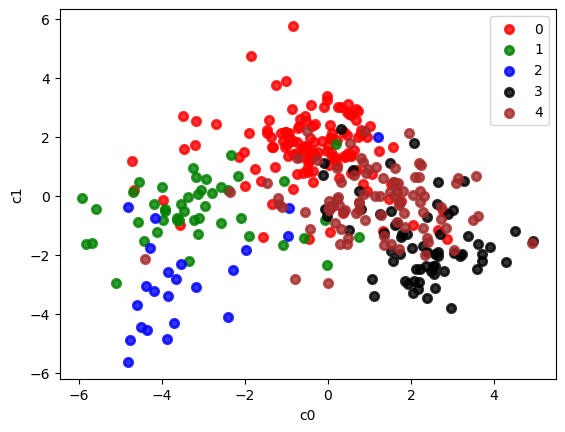

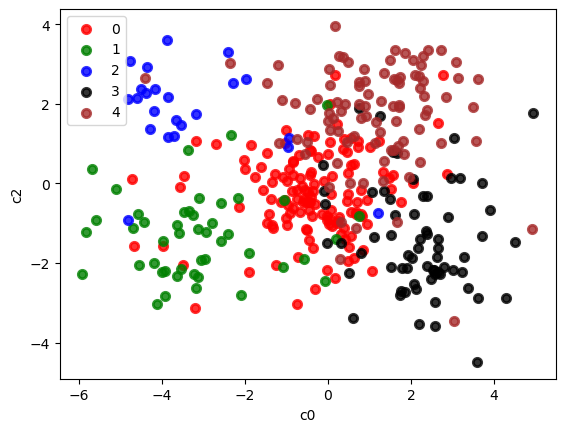

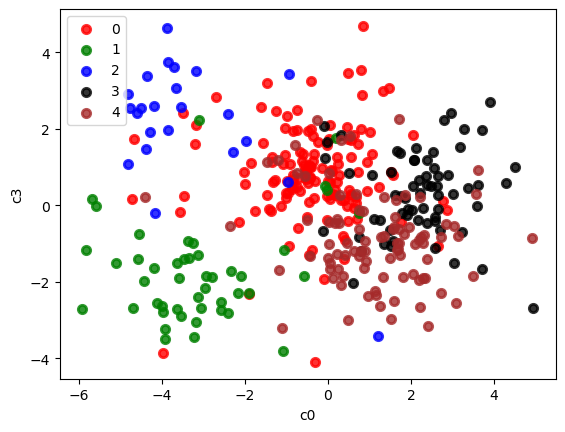

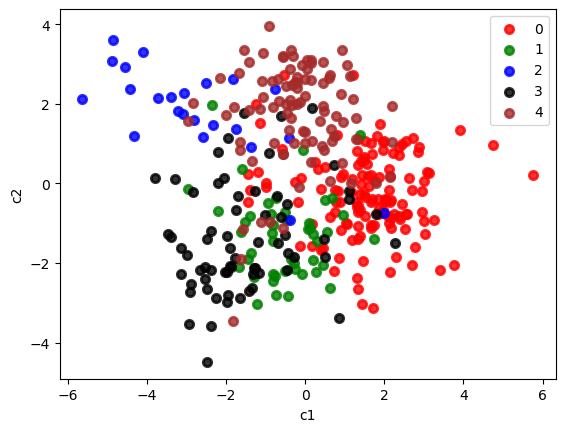

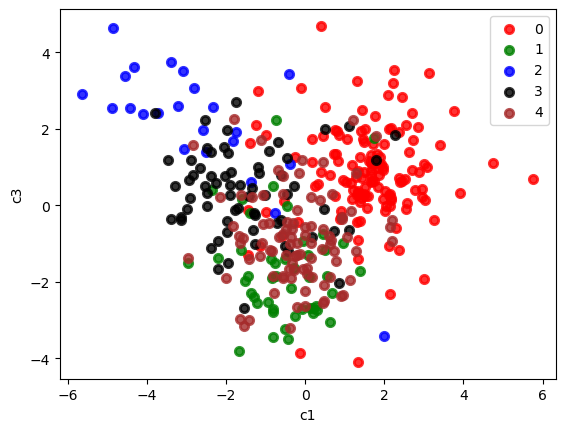

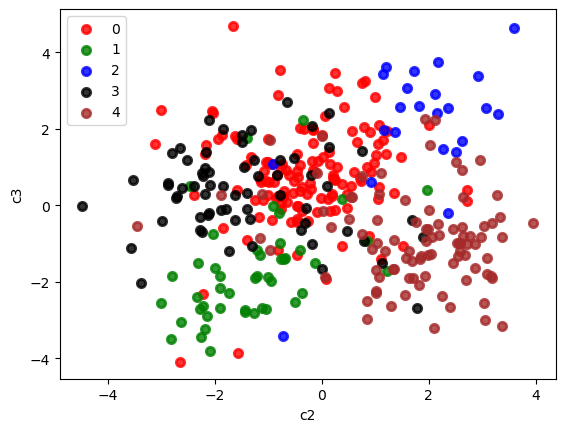

In [10]:
import itertools

import matplotlib.pyplot as plt

classes = np.unique(y_all)
class_colours = ["red", "green", "blue", "black", "brown"]


def plot_lda(lda, X, y):
    X = lda.transform(X)

    n_components = lda.scalings_.shape[1]
    components_pairs = list(itertools.combinations(range(n_components), 2))
    for i, (cx, cy) in enumerate(components_pairs):
        plt.figure()
        for i, (label, colour) in enumerate(zip(classes, class_colours)):
            plt.scatter(
                X[y == label, cx],
                X[y == label, cy],
                color=colour,
                alpha=0.8,
                lw=2,
                label=label,
            )
            plt.legend(loc="best")
            plt.xlabel(f"c{cx}")
            plt.ylabel(f"c{cy}")


# Plot how one of the classifier's LDAs separate the entire training set
plot_lda(svc_with_lda_classifiers[0].lda, X_train, y_train)


## What other options do we have?
The above ones aren't working so well...

In [11]:
# What about a neural network?
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(1024, 512, 256, 128, 64, 32, 16), random_state=42)

mlp_classifiers, mlp_scores = analyze_classifier(mlp)
display(mlp_scores)

{'accuracy': 0.5538461538461539,
 'f1': 0.5450688259109311,
 'precision': 0.5579820402562878,
 'recall': 0.5538461538461539}

In [12]:
# Test what we did before as a sanity check
combined_classifier = LinearSVCWithLDA(
    LinearDiscriminantAnalysis(), LinearSVC(random_state=42)
)
combined_classifier.fit(X_all, y_all)
y_pred = combined_classifier.predict(X_all)
combined_score = {
    "accuracy": accuracy_score(y_all, y_pred),
    "f1": f1_score(y_all, y_pred, average="weighted"),
    "precision": precision_score(y_all, y_pred, average="weighted"),
    "recall": recall_score(y_all, y_pred, average="weighted"),
}
display(combined_score)

{'accuracy': 0.9601873536299765,
 'f1': 0.9602635185002822,
 'precision': 0.9604086195702713,
 'recall': 0.9601873536299765}